In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sqlalchemy as sqla

In [7]:
# A regular SQL query
query = 'select fieldRA, fieldDec, expMJD, filter, fivesigmadepth from Summary where fieldID = 1000 group by expMJD;'

# Set up a dtype to catch the results
dtypes = [float, float, float, '|S1', float]
names = ['ra', 'dec', 'mjd', 'filter', 'fivesigmadepth']
dtypes = zip(names,dtypes)


In [8]:
# Use sqlalchemy to connect to an OpSim database
dbAddress = 'sqlite:///minion_1016_sqlite.db'
engine = sqla.create_engine(dbAddress)
connection = engine.raw_connection()
cursor = connection.cursor()

In [9]:
cursor.execute(query)
data = cursor.fetchall()
data = np.asarray(data, dtype=dtypes)

In [10]:
data

array([(5.718053, -0.674641, 59753.208268, 'g', 24.241311),
       (5.718053, -0.674641, 59753.225609, 'g', 24.160844),
       (5.718053, -0.674641, 59769.276675, 'z', 23.21587),
       (5.718053, -0.674641, 59769.299544, 'z', 23.36435),
       (5.718053, -0.674641, 59770.268672, 'y', 21.767917),
       (5.718053, -0.674641, 59773.276647, 'y', 21.812779),
       (5.718053, -0.674641, 59773.279951, 'y', 21.839962),
       (5.718053, -0.674641, 59773.357515, 'y', 21.876416),
       (5.718053, -0.674641, 59777.305047, 'y', 21.064121),
       (5.718053, -0.674641, 59777.317169, 'y', 21.145411),
       (5.718053, -0.674641, 59777.332157, 'y', 21.072341),
       (5.718053, -0.674641, 59777.340344, 'y', 21.073982),
       (5.718053, -0.674641, 59777.438488, 'y', 21.237192),
       (5.718053, -0.674641, 59778.441222, 'y', 20.909705),
       (5.718053, -0.674641, 59779.248287, 'z', 22.534023),
       (5.718053, -0.674641, 59779.265844, 'z', 22.527325),
       (5.718053, -0.674641, 59791.108313,

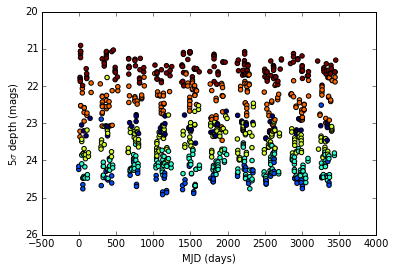

In [11]:
filter_color = np.zeros(data.size, dtype=int)
filter_names = ['u', 'g', 'r','i','z','y']
for i,fn in enumerate(filter_names):
    filter_color[np.where(data['filter'] == fn)] += i
plt.scatter(data['mjd']-data['mjd'].min(), data['fivesigmadepth'], c=filter_color)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.gca().invert_yaxis() # always plot mags backwards